<a href="https://colab.research.google.com/github/XingxinHE/Python-for-Data-Analysis-Notes/blob/master/5_3_Summarizing_and_Computing_Descriptive_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
      [np.nan, np.nan], [0.75, -1.3]],
      index=['a', 'b', 'c', 'd'],
      columns=['one', 'two'])

In [3]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [4]:
df.sum()#常用的，求总和，默认是每一column下的每个row叠加

one    9.25
two   -5.80
dtype: float64

In [5]:
df.sum(axis=1) #specify每一row下column相加

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [6]:
df.mean(axis=1, skipna=False) #默认来说NaN是当0处理，但也可以specify不要skipNa

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

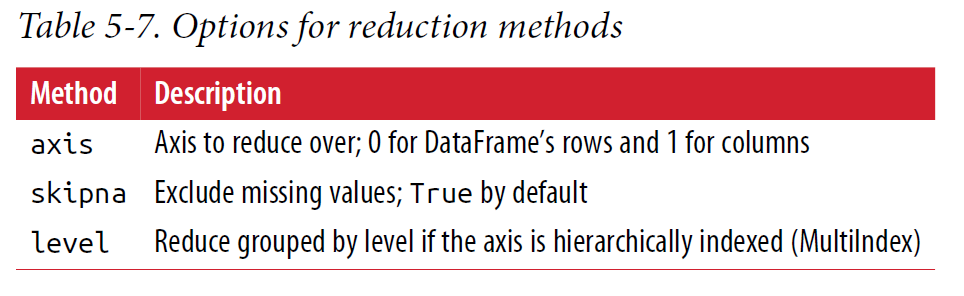

我经常会去想，看最大值或者最小值的value的index是啥，那么idxmin()和idxmax()就是我们想要的

In [7]:
df.idxmax()#结果能看到，one column下，b row最大，以此类推

one    b
two    d
dtype: object

In [8]:
df.cumsum() #这个奇奇怪怪的，就是accumulation，每一row都叠加起来

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [9]:
df.describe()#常用的，看这个column的stats

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [10]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)
obj.describe()
#如果是 non numerical data的话，会有如下的这种stats

count     16
unique     3
top        a
freq       8
dtype: object

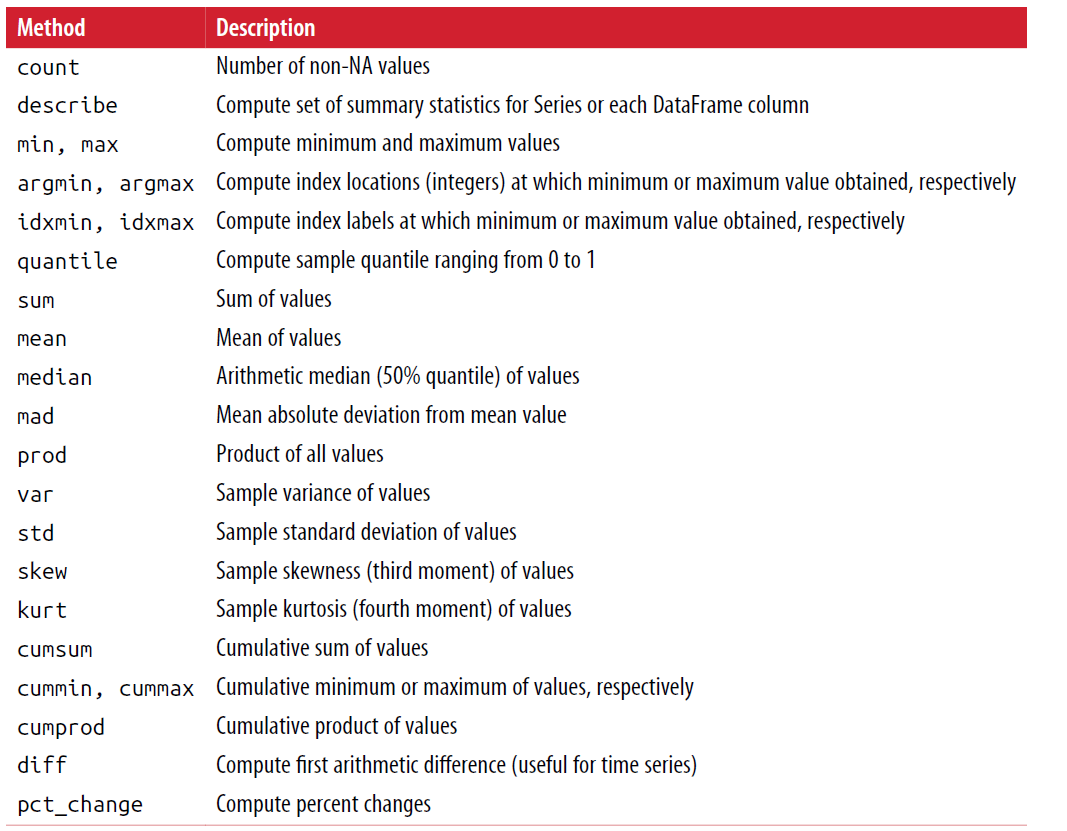

## Correlation and Covariance

.corr() 和 .cov()

我目前还不会这些统计概念的东西

## Unique Values, Value Counts, and Membership

In [11]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
uniques = obj.unique() #这个非常常用，看unique的item
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [12]:
obj.value_counts() #查看value出现的次数
#如果不想要这种sort好的order，可以添加 sort=False

a    3
c    3
b    2
d    1
dtype: int64

In [13]:
mask = obj.isin(['b', 'c'])
mask #筛选利器，isin()

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [14]:
obj[mask] #类似Grasshopper的pattern电池

0    c
5    b
6    b
7    c
8    c
dtype: object

接下来这个就是神器了，我经常在Grasshopper里面用到，就是输入一个list，看这个list的item在另外一个list的index，Grasshopper里面叫member index

pandas里有 **Index.get_indexer**

In [15]:
#list A  输入的list，期望得到index的
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])

#list B  被索引的
unique_vals = pd.Series(['c', 'b', 'a'])

#查看list A的值在 list B上的index如何
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2])

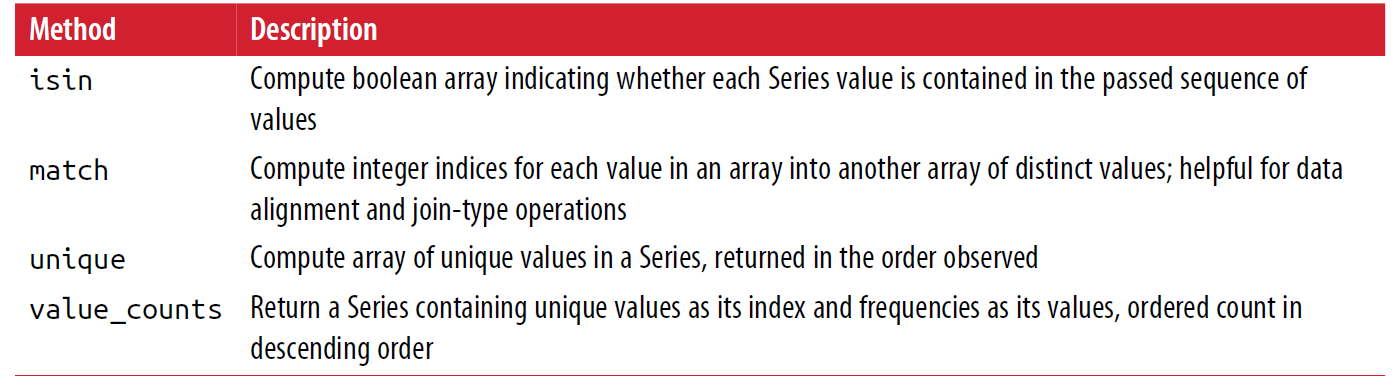

下面这个方法也是非常非常非常🐂🍺

通常我们得到一个df，我们想看各column里面每个item出现的次数

In [17]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
          'Qu2': [2, 3, 1, 2, 3],
          'Qu3': [1, 5, 2, 4, 4]})
#创建一个df,各column是一堆数字（有重复）
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [19]:
#用下面这个方法就很6
result = data.apply(pd.value_counts).fillna(0)
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


如Qu3是1，5，2，4，4，所以你看到上面的DF，各数字的次数与其吻合